

# Making automatic speech recognition work on large files with Wav2Vec2 in 🤗 Transformers

## 1. Simple Chunking

Cách đơn giản nhất để xử lý tệp âm thanh dài là **chia nhỏ âm thanh thành các đoạn ngắn hơn** (ví dụ: mỗi đoạn dài 10 giây), sau đó chạy mô hình nhận dạng trên từng đoạn và ghép kết quả lại.

Tuy nhiên, cách này **thường cho kết quả kém chính xác**, đặc biệt ở phần ranh giới giữa các đoạn. Lý do là vì mô hình cần có **bối cảnh xung quanh** để đưa ra dự đoán chính xác.

📌 **Vấn đề:**

* Nếu cắt không đúng chỗ (ví dụ: giữa câu, giữa từ), mô hình sẽ hiểu sai.
* Không phải lúc nào cũng dễ tìm được khoảng lặng trong âm thanh để cắt.
* Một số âm thanh có thể kéo dài liên tục mà không có khoảng nghỉ (như bài hát, tiếng ồn, hội thoại dài,...).

📊 Sơ đồ minh họa:
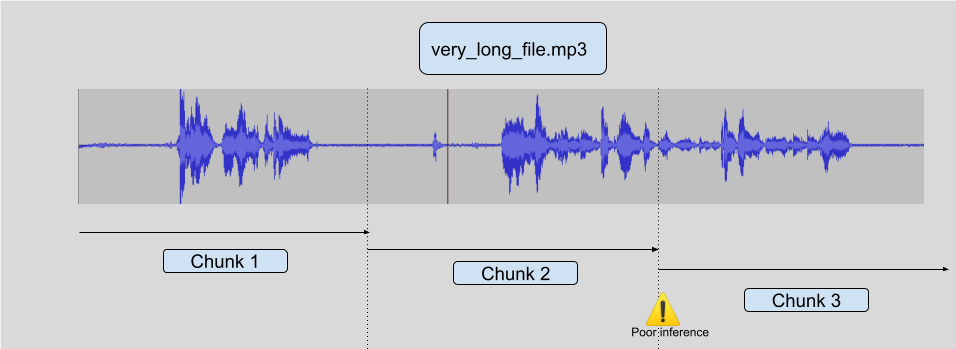

## 2. Chunking with Stride

Wav2Vec2 sử dụng thuật toán **CTC (Connectionist Temporal Classification)** – nó ánh xạ mỗi khung âm thanh thành một dự đoán (logit) cho một ký tự.

🎯 Ta có thể tận dụng đặc điểm này bằng cách **chia đoạn có chồng lắp (stride)** như sau:

* Mỗi đoạn âm thanh chồng một phần với đoạn trước và sau.
* Mô hình sẽ có **ngữ cảnh đầy đủ ở giữa đoạn**, nơi kết quả dự đoán tốt nhất.
* **Bỏ đi phần dự đoán ở rìa đoạn**, nơi thường kém chính xác hơn.
* Cuối cùng, **ghép các phần chính giữa lại với nhau**, ta sẽ được kết quả gần với việc mô hình xử lý toàn bộ tệp một lần.

📊 Sơ đồ minh họa:
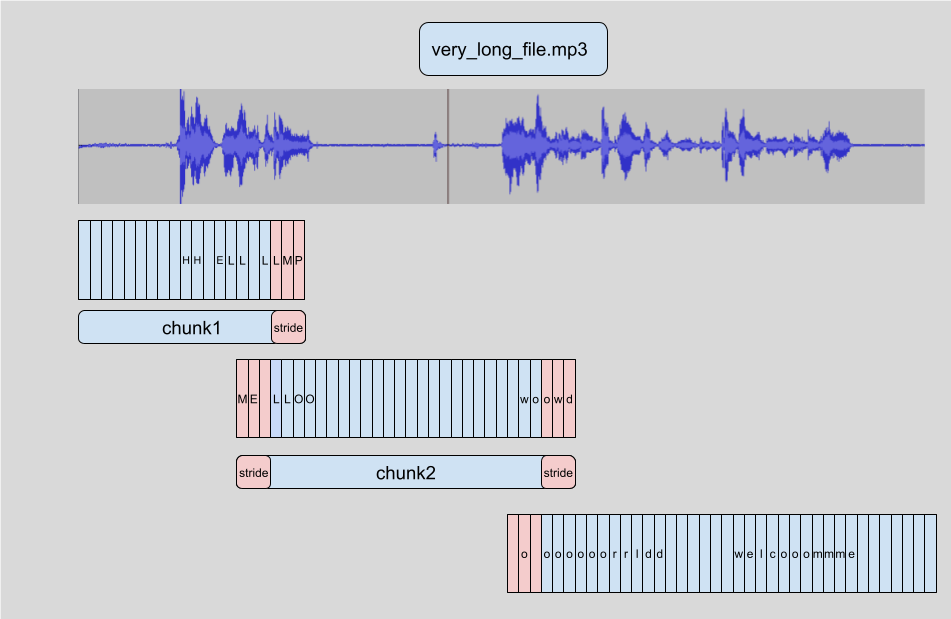

🛠 **Cách sử dụng trong code:**

```python
from transformers import pipeline

pipe = pipeline(model="facebook/wav2vec2-base-960h")

# chunk_length_s: độ dài mỗi đoạn cắt (tính bằng giây)
# stride_length_s: số giây chồng lắp giữa các đoạn (trái, phải)
# Ví dụ dưới đây: mỗi đoạn dài 10s, chồng 4s bên trái và 2s bên phải

output = pipe("very_long_file.mp3", chunk_length_s=10, stride_length_s=(4, 2))
```
